In [1]:
##Gaussian_naiveBayes algorithm
##Bell shape curve

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [11]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(keep = 'first', inplace = True)

In [13]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


**Gender Categorization**

In [19]:
print(f"No of people having sex as 1 are {x[1]} and no of people having sex 0 are {x[0]}")

No of people having sex as 1 are 206 and no of people having sex 0 are 96


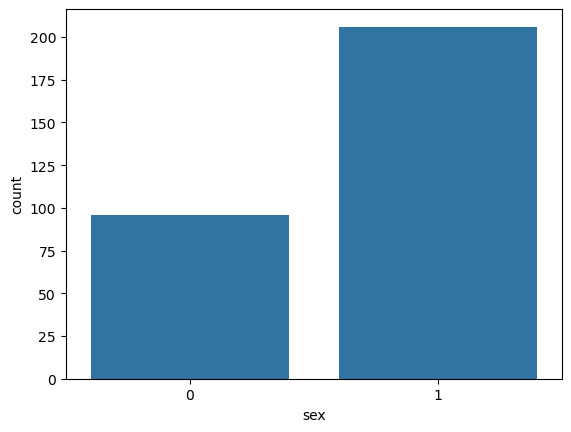

In [23]:
x = (df.sex.value_counts())
p = sns.countplot(data = df ,x= 'sex')
plt.show()

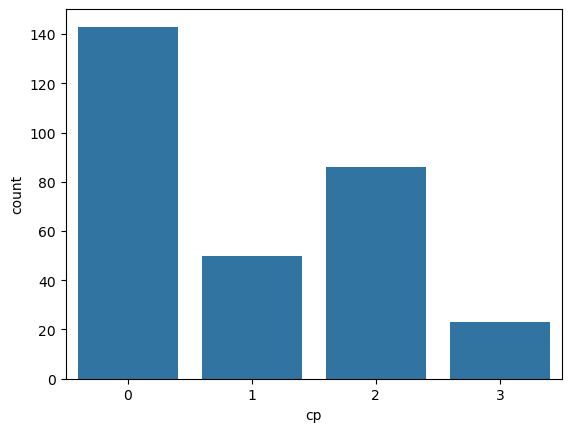

In [24]:
x = (df.cp.value_counts())
p = sns.countplot(data = df ,x= 'cp')
plt.show()

<Figure size 1000x1000 with 0 Axes>

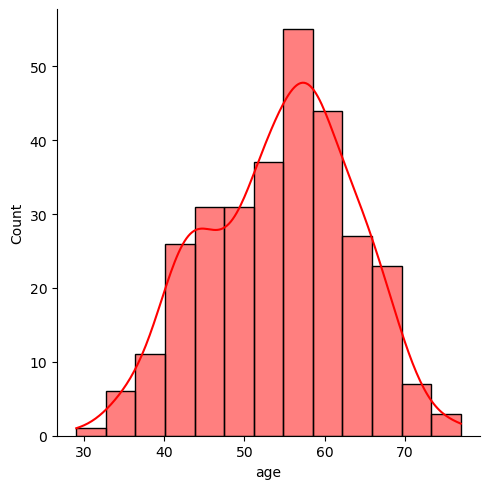

In [29]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color = 'red', label = 'age', kde = True)

<Figure size 1000x1000 with 0 Axes>

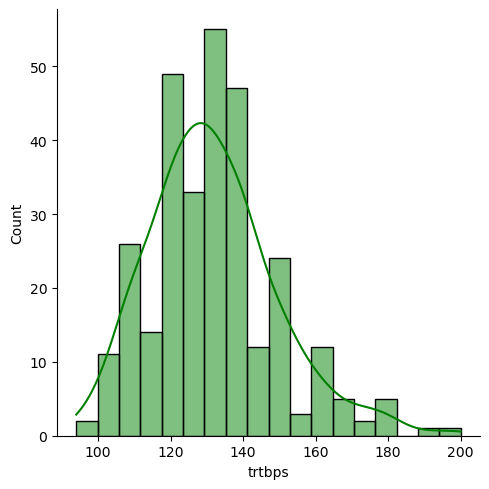

In [30]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps, color = 'green', label = 'Resting blood pressure', kde = True)

<Figure size 1000x1000 with 0 Axes>

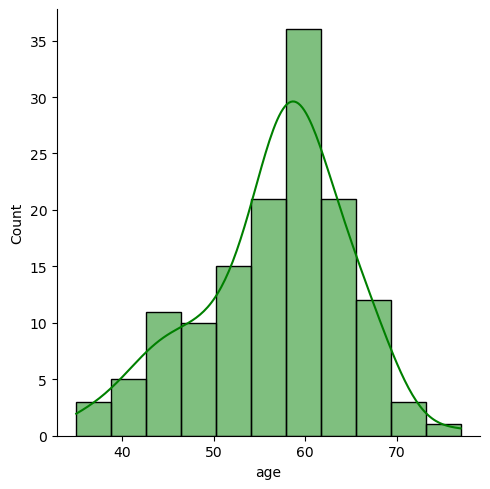

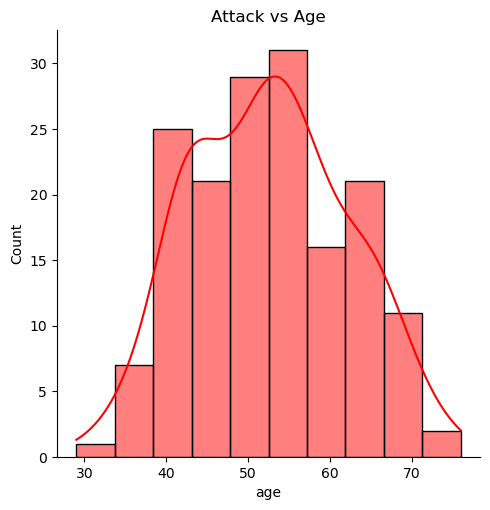

In [35]:
plt.figure(figsize=(10,10))
sns.displot(df[df['output']==0]['age'],color='green', kde = True)
sns.displot(df[df['output']==1]['age'],color='red', kde = True)
plt.title("Attack vs Age")
plt.show()

<Figure size 1000x1000 with 0 Axes>

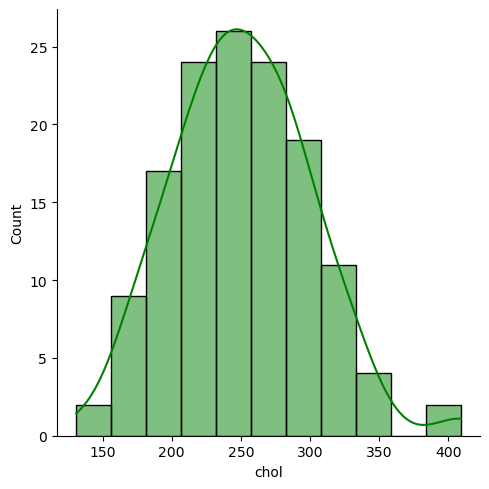

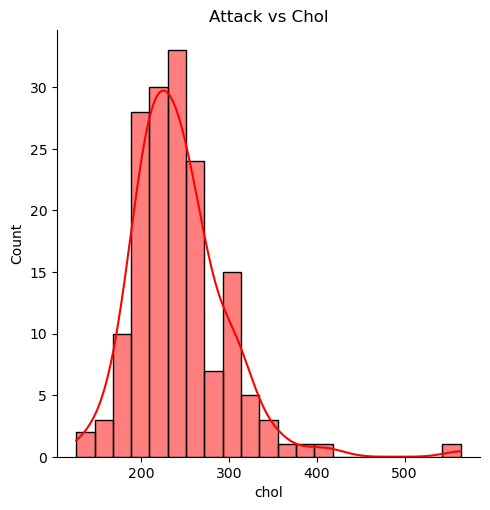

In [37]:
plt.figure(figsize=(10,10))
sns.displot(df[df['output']==0]['chol'],color='green', kde = True)
sns.displot(df[df['output']==1]['chol'],color='red', kde = True)
plt.title("Attack vs Chol")
plt.show()

In [39]:
y = df.iloc[:,-1].values
x = df.iloc[:,1:-1].values

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()

In [52]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
gnb = GaussianNB()

In [57]:
gnb.fit(X_train, y_train)

GaussianNB()

In [58]:
pred = []

In [59]:
gnb.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
score = accuracy_score(pred, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [0, 76]